In [ ]:
# Пропуски бывают трёх типов:
# Полностью случайные: если вероятность встретить пропуск не зависит ни от каких других значений. Таков пропуск пола Сансы Старк. Ответ на этот вопрос не зависит от характера самого вопроса и от других вопросов анкеты, а сам пропуск легко восстановить по имени.
# Случайные: если вероятность пропуска зависит от других значений в наборе данных, но не от значений собственного столбца. Случайным пропуском будет пропуск рода Джона Сноу. Пропущенное значение связано с тем, что рода Сноу не существует.
# Неслучайные: если вероятность пропуска зависит от других значений, в том числе и от значений собственного столбца. Это пропуск в политических намерениях Брана Старка: он не указал их нарочно, ведь умеет предвидеть будущее и не собирается сообщать о своих планах. Отсутствующее значение зависит как от характера вопроса, так и от особенности самого Брана Старка, то есть, значения переменной в другом столбце.


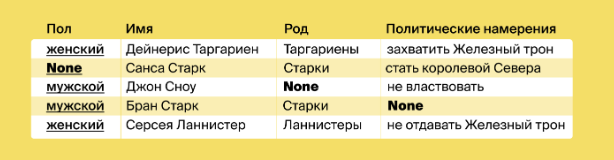 

In [ ]:
# Существует несколько вариантов замены пропусков категориальных значений. Например, замена значением по умолчанию. Такой вариант хорошо подойдёт для заполнения случайных пропусков. В таблице с результатами анкетирования нельзя заполнить род Джона Сноу, но для выполнения операций отсутствующее значение мешает. Заменим его на пустую строку.

"""
game_survey['family'] = game_survey['family'].fillna(value='')
"""

In [ ]:
# Иногда пропуски в категориальных столбцах могут принимать не стандартное значение None без определённого типа (NoneType), а значение типа String: например, 'None' , '-' , 'Null'. В таких случаях метод fillna() не подойдёт — он работает только со значениями NaN или None. Для замены строковых значений вызывают метод loc, он осуществляет логическую индексацию — выбор значений по заданному условию. Логическая индексация позволяет найти в столбце значения 'None' или другие значения типа String и заменить их.

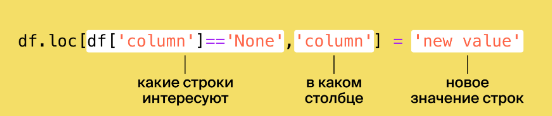

In [ ]:
# Таким способом можно заполнить полностью случайный пропуск в столбце gender.
"""
game_survey.loc[game_survey['gender'] == 'None', 'gender'] = 'женский' 
"""

In [ ]:
# Ранее мы считали количество визитов и покупок в задаче для Яндекс.Маркета. Посмотрим на результаты:

"""
print(logs.groupby('source')['purchase'].count()) 
"""

# Число визитов из источника undef значительно меньше любого другого источника трафика. Ещё раз взглянем на количество покупок из этого источника:

"""
purchase = logs.groupby('source')['purchase'].sum() 
"""

# Ранее вы находили конверсию так, Сперва посчитали количество строк с визитами, а затем суммировали значения в строках, чтобы найти число покупок. Для группировки столбца 'source' вызывали две функции: count() и sum(). Однако количество действий для решения задачи можно сократить.

# Вызовем метод agg(), указывающий, какие именно функции применить к столбцу 'purchase'. Название столбца и сами функции запишем в особую структуру данных —СЛОВАРЬ. Словарь состоит из КЛЮЧА и ЗНАЧЕНИЯ:

"""
{'purchase':['count','sum']} 
"""

# Здесь ключ — это название столбца, к которому нужно применить функции, а значением выступает список с названиями функций.

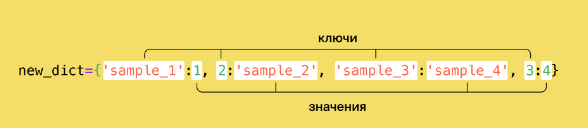

In [3]:
import pandas as pd
logs = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\da_yandex_practicum\\dataset\\logs.csv')

logs_grouped = logs.groupby('source').agg({'purchase': ['count', 'sum']})
logs_grouped

# Методом agg() посчитали все необходимые значения в одной таблице. Названия столбцов после такого действия стали «двойными». Чтобы обратиться к сумме покупок ['sum'] столбца ['purchase'], просто указываем их подряд:
logs_grouped['purchase']['sum'] 

source
context    3029
email       913
other      8041
undef        12
Name: sum, dtype: int64

In [4]:
import pandas as pd
logs = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\da_yandex_practicum\\dataset\\logs.csv')

logs['email'] = logs['email'].fillna(value='') # заменили все NaN пустыми значениями
print(logs.head())

      user_id   source       email  purchase
0  7141786820    other                     0
1  5644686960    email  c129aa540a         0
2  1914055396  context                     0
3  4099355752    other                     0
4  6032477554  context                     1


In [5]:
import pandas as pd
logs = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\da_yandex_practicum\\dataset\\logs.csv')

logs['email'] = logs['email'].fillna(value='')
print(logs.loc[(logs['source'] == 'None') & (logs['email'] == '')]) # логическая индексация с двумя условиями
# датафрейм пуст потому что у всех строчек без источника есть емэйл. Потому что, пользователь оставляет свйо мэйл только если он оформляет подписку.

Empty DataFrame
Columns: [user_id, source, email, purchase]
Index: []


In [ ]:
# Замените пропуски в строках с пустым значением source на значение 'email'. Проверьте результат методом value_counts().
import pandas as pd
logs = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\da_yandex_practicum\\dataset\\logs.csv')

logs['email'] = logs['email'].fillna(value='')
logs.loc[logs['source']=='None', 'source'] = 'email'

""" Этот оператор обновляет значения поля source в DataFrame logs следующим образом:

   - Он выбирает строки, в которых значение поля source равно None (logs['source']=='None').
   - Для выбранных строк он устанавливает значение поля source равным email.

   Это действие заменяет все пустые значения в поле source на email.
   
"""
print(logs['source'].value_counts())

""" Этот оператор подсчитывает количество появлений каждого уникального значения в поле source.

О методах:

* DataFrame.loc: Возвращает строки, отвечающие определенному условию. Синтаксис: df.loc[строки, столбцы].
* Series.value_counts: Подсчитывает количество появлений каждого уникального значения в серии (столбце). Синтаксис: series.value_counts().

"""

**Про value_counts()**

DataFrame.value_counts()\
Series.value_counts()


Параметры:

* normalize (bool, по умолчанию False): Если True, возвращаемые значения будут нормализованы так, что их сумма будет равна 1.
* bins (int или массив-подобный объект, по умолчанию None): Опция, доступная для Series с целочисленными или временными индексами. Она разделяет данные на указанное количество равномерно распределенных интервалов и подсчитывает значения в каждом интервале.
* dropna (bool, по умолчанию True): Если True, пропущенные значения будут исключены из вычислений.


In [1]:
import pandas as pd

data = pd.DataFrame({
    'source': ['email', 'web', 'api', 'email', 'web', 'api']
})

print(data['source'].value_counts())

source
email    2
web      2
api      2
Name: count, dtype: int64


In [2]:
import pandas as pd

tada = pd.DataFrame({
    'source': ['email', 'web', 'api', 'email', 'web', 'api']
})

print(tada['source'].value_counts(normalize=True))

source
email    0.333333
web      0.333333
api      0.333333
Name: proportion, dtype: float64


In [8]:
import pandas as pd

tada = pd.DataFrame({
    'source': [1, 2, 3, 1, 2, 3]
})

print(tada['source'].value_counts(bins=3))

"""
Если у нас есть Series с целочисленными индексами, мы можем использовать параметр bins для разделения данных на интервалы и подсчета значений в каждом интервале:
 """

(0.997, 1.667]    2
(1.667, 2.333]    2
(2.333, 3.0]      2
Name: count, dtype: int64


'\nЕсли у нас есть Series с целочисленными индексами, мы можем использовать параметр bins для разделения данных на интервалы и подсчета значений в каждом интервале:\n '

In [16]:
import pandas as pd

tada = pd.DataFrame({
    'source': ['email', None,  'web', 'api', 'email', 'web', 'api']
})

tada['source'].value_counts(dropna=False)

""" 
Применение:

Метод value_counts() полезен для:

* Подсчета частоты появления различных категорий в данных.
* Выявления наиболее или наименее распространенных значений.
* Агрегирования данных по категориям.
* Визуализации распределения данных.
"""

source
email    2
web      2
api      2
None     1
Name: count, dtype: int64